In [115]:
library(Seurat)
library(tidyverse)
options(stringsAsFactors = FALSE)

source('../scripts/plotting.R')

In [116]:
get_lr_sc_data <- function() {
    seurat_obj = readRDS('../processing/scanpy/sc_gene.rds')
    return(seurat_obj)
}

get_sr_sc_data <- function() {
    load('../processing/seurat/sc_1k.rda')
    seurat_obj <- mb_mt_1k
    return(seurat_obj)
}

### Panel 2C

pdf 
  2

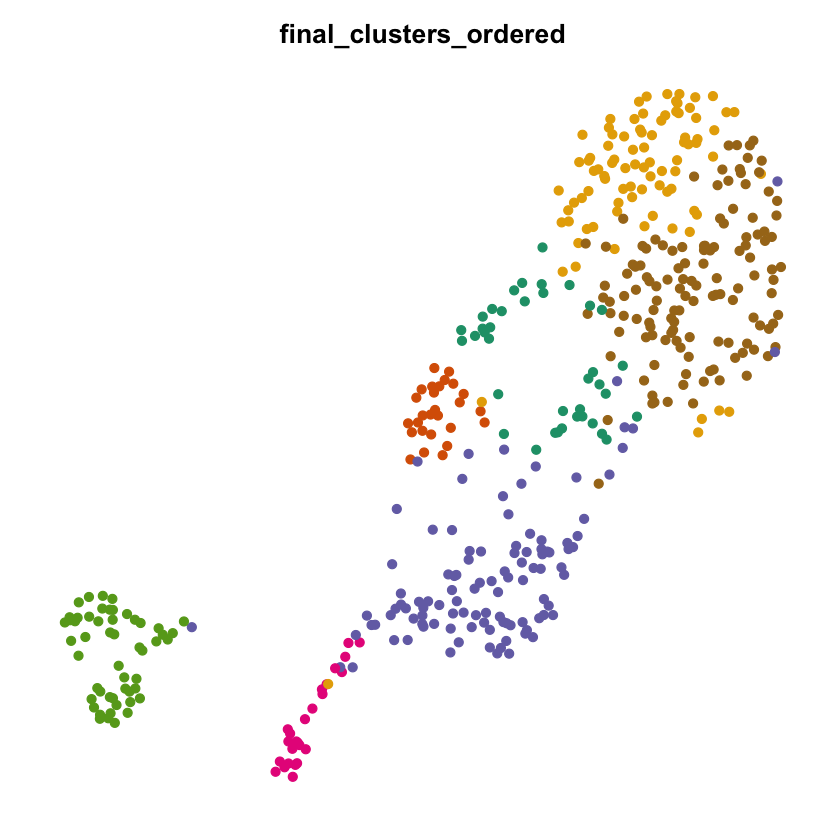

In [118]:
opref = 'figures/'
seurat_obj = get_sr_sc_data()
colors = get_short_clust_colors()

p = DimPlot(
  object = seurat_obj,pt.size = 2.2,
  group.by = 'final_clusters_ordered',
  label = F,label.size = 6,
  repel = TRUE)  + NoLegend() + NoAxes()+ scale_color_manual(values = colors)

pdf(file = paste0(opref, "shortreads_464cells_UMAP_dark2.pdf"), width = 5.5, height = 5)
dev.off()
p

In [97]:
colors = get_sample_colors()
p = ggplot(seurat_obj@meta.data, aes(x=final_clusters_ordered, fill=SampleType)) + 
    geom_bar(position = "fill")  + 
    scale_fill_manual(values=colors) + 
    coord_flip()
fname = 'figures/shortreads_464cells_barplot.pdf'
pdf(file = fname,
    width = 3.2,
    height = 4.5)
dev.off()

p

ERROR: Error in ggplot(seurat_obj@meta.data, aes(x = final_clusters_ordered, : trying to get slot "meta.data" from an object of a basic class ("character") with no slots


### Panel 2D cluster proportions

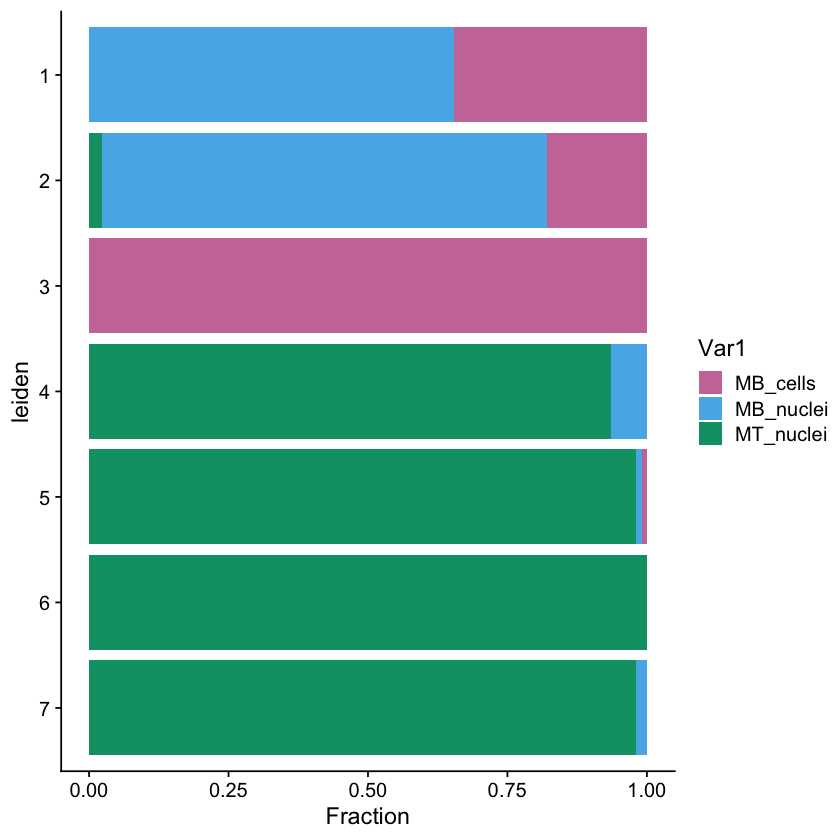

In [83]:
opref = 'figures/'
seurat_obj = get_lr_sc_data()
colors = get_sample_colors()
p = plot_clust_prop(seurat_obj, 'sample', colors, opref)
p

### Panel 2E cluster proportions

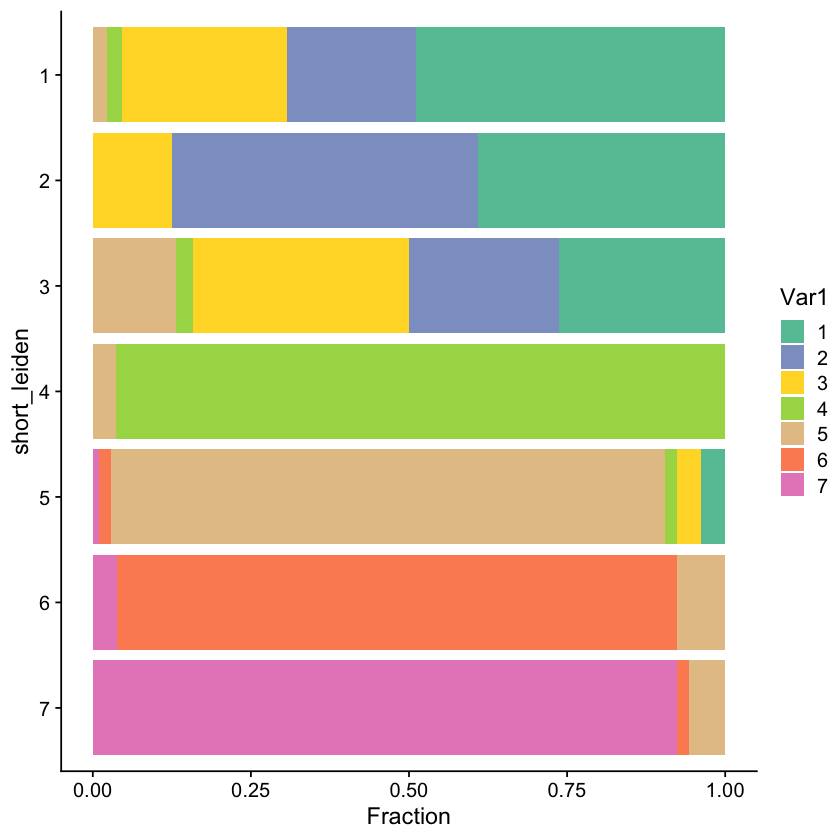

In [84]:
opref = 'figures/'
seurat_obj = get_lr_sc_data()
colors = get_long_clust_colors()
p = plot_short_clust_prop(seurat_obj, 'leiden', colors, opref)
p